In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def movie_ratings(home_url, number_of_seasons, title):
    episodes = home_url+'episodes/'
    df = pd.DataFrame()

    for season in [x+1 for x in range(number_of_seasons)]:
        url = episodes + '?season='+str(season)
        response = requests.get(url)
        html_soup = BeautifulSoup(response.text, 'html.parser')
        odd_episodes = html_soup.find_all('div', class_ = 'list_item odd')
        even_episodes = html_soup.find_all('div', class_ = 'list_item even')


        for first_episode in odd_episodes:
            name = first_episode.find_all('div', class_= 'info')[0].a.text
            rating = float(first_episode.find_all('span', class_= 'ipl-rating-star__rating')[0].text)
            episode_number = first_episode.find_all('div')[2].text
            df = df.append([[name, rating, episode_number]])


        for first_episode in even_episodes:
            name = first_episode.find_all('div', class_= 'info')[0].a.text
            rating = float(first_episode.find_all('span', class_= 'ipl-rating-star__rating')[0].text)
            episode_number = first_episode.find_all('div')[2].text
            df = df.append([[name, rating, episode_number]])
    df['Series'] = df[2].str.split(',').str[0]
    df['Episode'] = df[2].str.split(' ').str[1]
    df['Series'] = df['Series'].str.strip('S').astype(float)
    df['Episode'] = df['Episode'].str.strip('Ep').astype(float)
    df = df.sort_values(by = ['Series', 'Episode']).reset_index(drop = True).reset_index()
    df = df.rename(columns = {0:'Episode Name', 1: 'Episode Rating', 'index': 'Episode Number'})
    df = df.dropna()
    plt.figure(figsize=(20,10))
    plt.plot(df['Episode Number'], df['Episode Rating'])
    plt.ylim([0,10])
    # plt.title(title)
    plt.figtext(.5,.9, title, fontsize=60, ha='center')
    plt.savefig('series.jpeg',  bbox_inches='tight' )
    df.to_csv('Episode_Log.csv', index = False)
    print(df.sort_values(by = 'Episode Rating', ascending=True).head(1))
    print(df.sort_values(by = 'Episode Rating', ascending=False).head(5))

     Episode Number Episode Name  Episode Rating         2  Series  Episode
106             106       Access             7.1  S5, Ep18     5.0     18.0
    Episode Number                          Episode Name  Episode Rating  \
43              43                        Two Cathedrals             9.8   
22              22   In the Shadow of Two Gunmen: Part I             9.5   
31              31                                  Noël             9.4   
23              23  In the Shadow of Two Gunmen: Part II             9.4   
88              88                           Twenty Five             9.3   

           2  Series  Episode  
43  S2, Ep22     2.0     22.0  
22   S2, Ep1     2.0      1.0  
31  S2, Ep10     2.0     10.0  
23   S2, Ep2     2.0      2.0  
88  S4, Ep23     4.0     23.0  


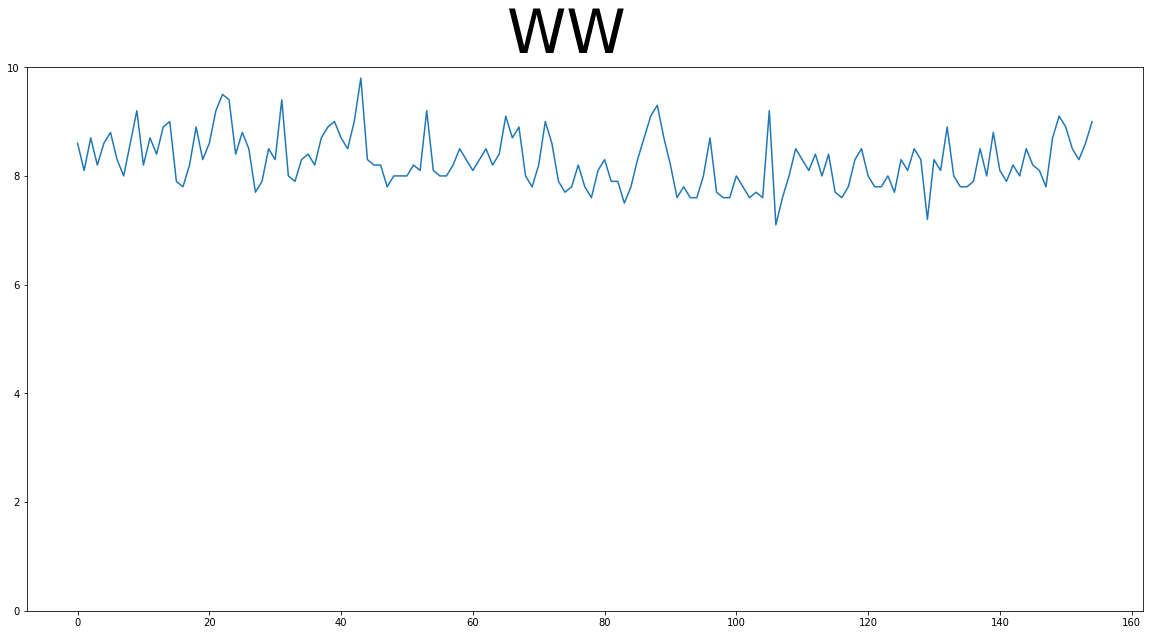

In [3]:
movie_ratings('https://www.imdb.com/title/tt0200276/', 7, '''WW''')